In [1]:
import pandas as pd
from astropy.io import ascii
from astropy.io import fits
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

/wsu/home/hq/hq23/hq2335/.local/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [3]:
results_df = ascii.read('out/results.txt').to_pandas()
results_df.head()

,id,best.stellar.m_star,bayes.stellar.m_star,bayes.stellar.m_star_err,best.reduced_chi_square,best.sfh.age_main,best.sfh.tau_main,bayes.agn.luminosity,bayes.agn.fracAGN,bayes.agn.luminosity_err,bayes.agn.fracAGN_err,redshift
0,2563,1.943878e+15,4.249860e+15,1.767623e+15,7.782284,500.0,200.0,4.028108e+42,0.141578,2.579982e+42,0.081304,0.304762
1,4159,2.495061e+15,3.053244e+15,1.247776e+15,4.636050,500.0,200.0,8.196575e+42,0.105817,1.926314e+42,0.041493,0.344412
2,4409,3.847632e+15,4.637642e+15,1.017745e+15,8.586950,1000.0,200.0,3.083965e+42,0.160958,2.090403e+42,0.093639,0.255167
3,3388,4.084083e+15,3.565002e+15,1.075355e+15,9.156857,500.0,200.0,7.437757e+42,0.101917,1.253213e+42,0.019719,0.393802
4,4739,4.112456e+15,2.239985e+15,1.386412e+15,8.910529,7000.0,1000.0,4.221108e+42,0.539590,3.548757e+41,0.200121,0.153150


In [5]:
columns_of_interest = ['id', 'best.stellar.m_star', 'bayes.stellar.m_star', 'bayes.stellar.m_star_err', 'best.reduced_chi_square',
                        'best.sfh.age_main', 'best.sfh.tau_main', 'bayes.agn.luminosity', 'bayes.agn.fracAGN', 'bayes.agn.luminosity_err', 'bayes.agn.fracAGN_err']


major_results = results_df[results_df['best.stellar.m_star'].notna()][columns_of_interest]
major_results

,id,best.stellar.m_star,bayes.stellar.m_star,bayes.stellar.m_star_err,best.reduced_chi_square,best.sfh.age_main,best.sfh.tau_main,bayes.agn.luminosity,bayes.agn.fracAGN,bayes.agn.luminosity_err,bayes.agn.fracAGN_err
0,2563,1.943878e+15,4.249860e+15,1.767623e+15,7.782284,500.0,200.0,4.028108e+42,0.141578,2.579982e+42,8.130393e-02
1,4159,2.495061e+15,3.053244e+15,1.247776e+15,4.636050,500.0,200.0,8.196575e+42,0.105817,1.926314e+42,4.149284e-02
2,4409,3.847632e+15,4.637642e+15,1.017745e+15,8.586950,1000.0,200.0,3.083965e+42,0.160958,2.090403e+42,9.363913e-02
3,3388,4.084083e+15,3.565002e+15,1.075355e+15,9.156857,500.0,200.0,7.437757e+42,0.101917,1.253213e+42,1.971876e-02
4,4739,4.112456e+15,2.239985e+15,1.386412e+15,8.910529,7000.0,1000.0,4.221108e+42,0.539590,3.548757e+41,2.001206e-01
...,...,...,...,...,...,...,...,...,...,...,...
485,4127,9.298629e+17,9.298629e+17,4.649315e+16,30.673173,5000.0,200.0,2.146817e+43,0.100000,1.073409e+42,0.000000e+00
486,2909,9.311480e+17,9.311480e+17,4.655740e+16,54.683668,5000.0,200.0,2.149784e+43,0.100000,1.074892e+42,0.000000e+00
487,3633,9.411975e+17,9.411975e+17,4.705987e+16,33.305761,5000.0,200.0,2.172986e+43,0.100000,1.086493e+42,0.000000e+00
488,4225,9.412034e+17,9.412034e+17,4.706017e+16,48.909929,5000.0,200.0,2.173000e+43,0.100000,1.086500e+42,1.387779e-17


<ErrorbarContainer object of 3 artists>

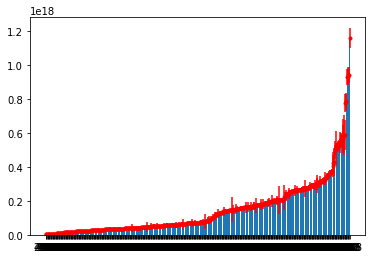

In [6]:
major_results = major_results.sort_values('best.stellar.m_star')
plt.bar(major_results['id'].astype('str'), major_results['best.stellar.m_star'])
plt.errorbar(major_results['id'].astype('str'), major_results['best.stellar.m_star'],
             yerr=major_results['bayes.stellar.m_star_err'], fmt = '.', color = 'red')


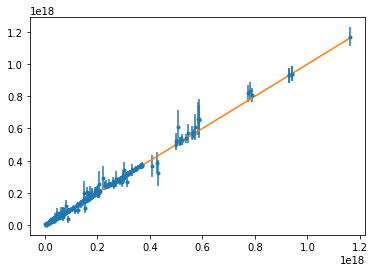

In [7]:
plt.errorbar(major_results['best.stellar.m_star'], major_results['bayes.stellar.m_star'],
             yerr=major_results['bayes.stellar.m_star_err'], fmt = '.')
plt.plot([min(major_results['best.stellar.m_star']), max(major_results['best.stellar.m_star'])],
         [min(major_results['best.stellar.m_star']), max(major_results['best.stellar.m_star'])])


Text(0.5, 0, 'Stellar Mass ($M_\\odot$)')

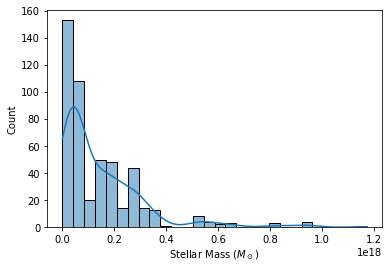

In [8]:
sns.histplot(data=major_results, x='bayes.stellar.m_star', kde = True)
plt.xlabel('Stellar Mass ($M_\odot$)')

Text(0.5, 0, 'AGN Luminosity')

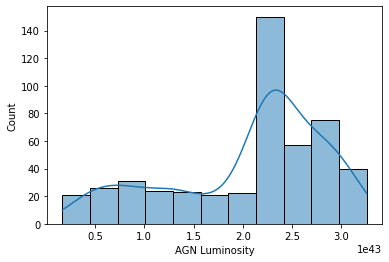

In [9]:
sns.histplot(data=major_results, x='bayes.agn.luminosity',  kde = True)
plt.xlabel('AGN Luminosity')

<AxesSubplot:xlabel='best.reduced_chi_square', ylabel='Count'>

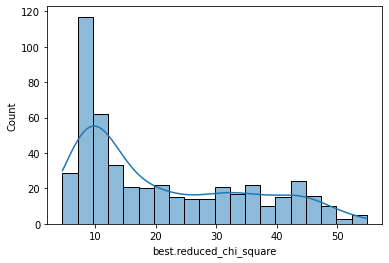

In [10]:
sns.histplot(data=major_results, x='best.reduced_chi_square', bins = 20, kde = True)

<AxesSubplot:ylabel='Frequency'>

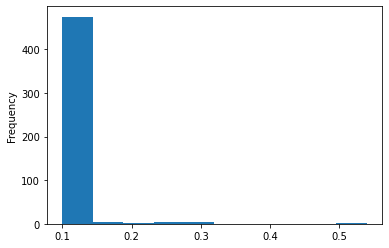

In [11]:
major_results['bayes.agn.fracAGN'].plot(kind='hist')

#### compare good and bad models

In [12]:
observations_df = ascii.read('out/observations.txt').to_pandas()
observations_df

,id,redshift,xray_boxcar_2to10keV,xray_boxcar_2to10keV_err,xray_boxcar_0p5to2keV,xray_boxcar_0p5to2keV_err,galex.FUV,galex.FUV_err,galex.NUV,galex.NUV_err,...,WISE3,WISE3_err,WISE4,WISE4_err,PSW,PSW_err,PMW,PMW_err,PLW,PLW_err
0,2360,0.289961,NaN,NaN,4.635,0.655488,NaN,NaN,NaN,NaN,...,NaN,NaN,2600000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2387,0.361524,1.9880,0.281146,8.262,1.168423,10676.0,2092.789946,40209.0,4502.478519,...,637730.0,153204.064988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2463,0.379045,1.3840,0.195727,3.744,0.529482,NaN,NaN,NaN,NaN,...,NaN,NaN,2600000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2471,0.399646,NaN,NaN,4.747,0.671327,NaN,NaN,NaN,NaN,...,655510.0,173184.940457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2525,0.374848,3.0980,0.438123,6.770,0.957423,NaN,NaN,NaN,NaN,...,NaN,NaN,2600000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,5100,0.895357,0.9850,0.139300,7.137,1.009324,8190.9,1203.308222,20296.0,2241.780578,...,263650.0,104190.945984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
525,5155,0.984770,0.4672,0.066072,1.466,0.207324,7603.5,1142.839605,15165.0,1772.035874,...,297600.0,129369.500270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
526,489,0.932010,0.8230,0.116390,2.420,0.342240,NaN,NaN,9896.4,1123.712872,...,367030.0,105247.136821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
527,503,0.938682,5.2970,0.749109,7.105,1.004799,NaN,NaN,18456.0,2357.610731,...,314130.0,108927.804389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
obs_good = observations_df[observations_df.id.isin(major_results.id)]
obs_bad = observations_df[~observations_df.id.isin(major_results.id)]

In [16]:
obs_good.describe().compare( obs_bad.describe())

id                  redshift             \
                self         other        self      other   
count     490.000000     39.000000  490.000000  39.000000   
mean     8221.346939   4834.076923    0.605064   1.084252   
std     22465.227452   7488.508380    0.268678   0.742163   
min       399.000000    424.000000    0.090092   0.393643   
25%      3110.750000   2919.000000    0.388015   0.847607   
50%      3925.000000   3865.000000    0.575817   1.016392   
75%      4629.000000   4271.500000    0.797701   1.133731   
max    180999.000000  50021.000000    1.199757   5.391201   

      xray_boxcar_2to10keV            xray_boxcar_2to10keV_err             \
                      self      other                     self      other   
count           425.000000  33.000000               425.000000  33.000000   
mean              3.925697   7.747348                 0.555177   1.095641   
std               4.545393  14.157692                 0.642816   2.002200   
min               0.303200   0.590200                 0.042879   0.083467   
25%               1.273000   1.755000                 0.180029   0.248194   
50%               2.348000   2.860000                 0.332057   0.404465   
75%               4.528000   5.971000                 0.640356   0.844427   
max              32.230000  73.660000                 4.558010  10.417097   

      xray_boxcar_0p5to2keV              ...       PSW_err                \
                       self       other  ...          self         other   
count            480.000000   38.000000  ...  4.000000e+01  7.000000e+00   
mean              10.184152   20.474789  ...  1.223694e+07  1.225361e+07   
std               15.766694   32.471580  ...  1.531519e+06  8.845088e+05   
min                0.166100    1.107000  ...  1.075428e+07  1.142795e+07   
25%                2.754750    3.794750  ...  1.125656e+07  1.146844e+07   
50%                4.964500    8.073500  ...  1.180079e+07  1.226277e+07   
75%               10.445000   24.132500  ...  1.245959e+07  1.282339e+07   
max              124.300000  149.600000  ...  1.878521e+07  1.350091e+07   

                PMW                     PMW_err                         PLW  \
               self         other          self         other          self   
count  2.800000e+01  4.000000e+00  2.800000e+01  4.000000e+00  7.000000e+00   
mean   3.665836e+07  5.679350e+07  1.115674e+07  1.208159e+07  4.091600e+07   
std    2.168343e+07  1.863486e+07  1.277986e+06  7.916531e+05  3.229666e+07   
min    2.075000e+07  3.083900e+07  1.037283e+07  1.097230e+07  2.429800e+07   
25%    2.567725e+07  5.078825e+07  1.056122e+07  1.180376e+07  2.630350e+07   
50%    3.182250e+07  6.100850e+07  1.085413e+07  1.229392e+07  2.873500e+07   
75%    3.841050e+07  6.701375e+07  1.121851e+07  1.257175e+07  3.354100e+07   
max    1.348500e+08  7.431800e+07  1.730176e+07  1.276621e+07  1.136900e+08   

                          PLW_err                
              other          self         other  
count  2.000000e+00  7.000000e+00  2.000000e+00  
mean   8.151050e+07  1.218980e+07  1.391370e+07  
std    2.531230e+07  1.957913e+06  1.301214e+06  
min    6.361200e+07  1.122611e+07  1.299360e+07  
25%    7.256125e+07  1.124291e+07  1.345365e+07  
50%    8.151050e+07  1.156664e+07  1.391370e+07  
75%    9.045975e+07  1.172708e+07  1.437375e+07  
max    9.940900e+07  1.659585e+07  1.483380e+07  

[8 rows x 80 columns]

<AxesSubplot:xlabel='redshift', ylabel='Count'>

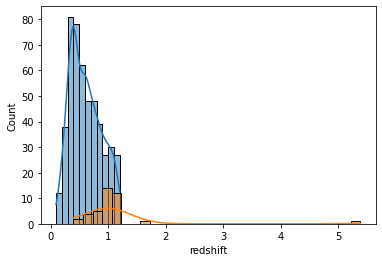

In [17]:
col_of_int = 'redshift'
sns.histplot(data=obs_good, x=col_of_int, kde = True)
sns.histplot(data=obs_bad, x=col_of_int, kde = True)

In [18]:
major_results = major_results.merge(observations_df[['id', 'redshift']], how='inner', on = 'id')
major_results.head()

,id,best.stellar.m_star,bayes.stellar.m_star,bayes.stellar.m_star_err,best.reduced_chi_square,best.sfh.age_main,best.sfh.tau_main,bayes.agn.luminosity,bayes.agn.fracAGN,bayes.agn.luminosity_err,bayes.agn.fracAGN_err,redshift
0,2563,1.943878e+15,4.249860e+15,1.767623e+15,7.782284,500.0,200.0,4.028108e+42,0.141578,2.579982e+42,0.081304,0.304762
1,4159,2.495061e+15,3.053244e+15,1.247776e+15,4.636050,500.0,200.0,8.196575e+42,0.105817,1.926314e+42,0.041493,0.344412
2,4409,3.847632e+15,4.637642e+15,1.017745e+15,8.586950,1000.0,200.0,3.083965e+42,0.160958,2.090403e+42,0.093639,0.255167
3,3388,4.084083e+15,3.565002e+15,1.075355e+15,9.156857,500.0,200.0,7.437757e+42,0.101917,1.253213e+42,0.019719,0.393802
4,4739,4.112456e+15,2.239985e+15,1.386412e+15,8.910529,7000.0,1000.0,4.221108e+42,0.539590,3.548757e+41,0.200121,0.153150


<AxesSubplot:xlabel='redshift', ylabel='bayes.stellar.m_star'>

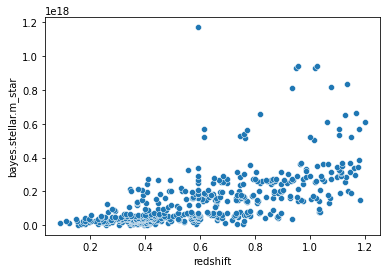

In [19]:
sns.scatterplot(data=major_results, y = 'bayes.stellar.m_star', x = 'redshift')

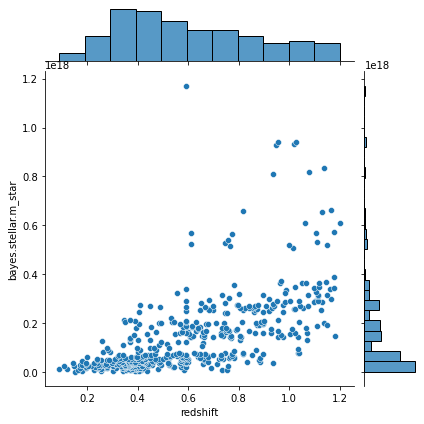

In [18]:
sns.jointplot(data=major_results, y = 'bayes.stellar.m_star', x = 'redshift')

AttributeError: 'JointGrid' object has no attribute 'errorbar'

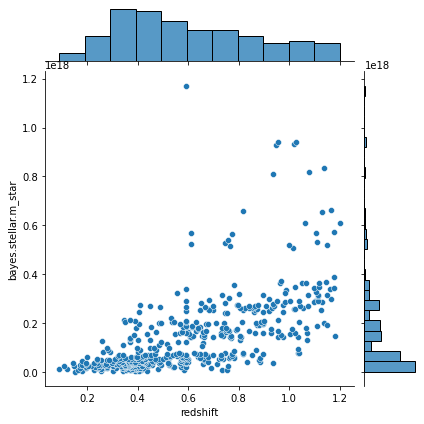

In [18]:
ax = sns.jointplot(data=major_results, y = 'bayes.stellar.m_star', x = 'redshift')
ax.errorbar(major_results['redshift'], major_results['bayes.stellar.m_star'], 
            yerr=major_results['bayes.stellar.m_star_err'], fmt = '.')

Text(0, 0.5, 'Stellar Mass $(M_\\odot)$')

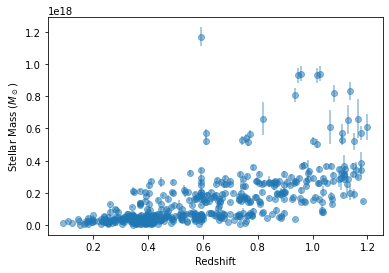

In [19]:
# sns.jointplot(data=major_results, y = 'bayes.stellar.m_star', x = 'redshift')
plt.errorbar(major_results['redshift'], major_results['bayes.stellar.m_star'],
             yerr=major_results['bayes.stellar.m_star_err'], fmt = 'o', alpha=0.5)
plt.xlabel('Redshift')
plt.ylabel('Stellar Mass $(M_\odot)$')

<ErrorbarContainer object of 3 artists>

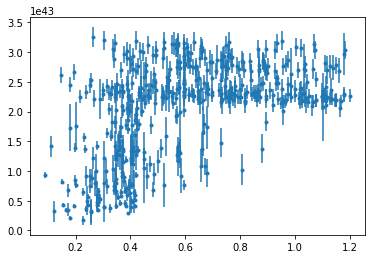

In [20]:
plt.errorbar(major_results['redshift'], major_results['bayes.agn.luminosity'],
             yerr=major_results['bayes.agn.luminosity_err'], fmt = '.')

<ErrorbarContainer object of 3 artists>

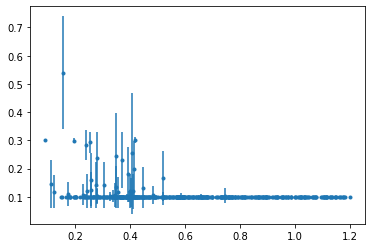

In [21]:
plt.errorbar(major_results['redshift'], major_results['bayes.agn.fracAGN'],
             yerr=major_results['bayes.agn.fracAGN_err'], fmt = '.')

In [20]:
s82x_mbh_ids = [1, 2, 9, 10, 15, 22, 28, 31, 32, 35, 40, 41, 45, 47, 48, 49, 52, 54, 56, 85, 88, 93, 97, 100, 102, 106, 111, 114, 125, 126, 129, 135, 140, 143, 146, 153, 156, 161, 166, 167, 169, 170, 177, 178, 186, 188, 190, 195, 205, 216, 220, 227, 253, 255, 264, 267, 268, 279, 287, 298, 301, 303, 304, 306, 309, 310, 311, 312, 318, 320, 323, 326, 327, 328, 333, 335, 336, 337, 342, 343, 348, 357, 366, 368, 371, 373, 374, 378, 381, 382, 383, 395, 399, 402, 405, 406, 417, 425, 434, 436, 450, 454, 473, 477, 479, 486, 488, 489, 491, 493, 494, 495, 505, 507, 509, 517, 520, 521, 524, 529, 531, 539, 543, 545, 547, 549, 553, 561, 562, 563, 568, 571, 573, 577, 578, 579, 582, 586, 593, 597, 600, 601, 602, 610, 615, 623, 625, 628, 630, 640, 642, 644, 653, 656, 658, 661, 663, 670, 675, 690, 691, 710, 717, 720, 723, 739, 741, 746, 754, 763, 773, 782, 812, 836, 901, 934, 935, 980, 992, 999, 1012, 1028, 1045, 1074, 1092, 1104, 1106, 1151, 1152, 1164, 1172, 1182, 1187, 1195, 1221, 1227, 1228, 1233, 1242, 1249, 1270, 1286, 1314, 1323, 1325, 1327, 1347, 1350, 1368, 1385, 1393, 1397, 1418, 1426, 1430, 1431, 1444, 1467, 1485, 1488, 1491, 1513, 1515, 1528, 1531, 1536, 1538, 1539, 1549, 1556, 1562, 1565, 1567, 1577, 1602, 1614, 1615, 1617, 1620, 1628, 1629, 1642, 1660, 1667, 1670, 1674, 1680, 1685, 1687, 1693, 1709, 1720, 1721, 1727, 1734, 1742, 1744, 1753, 1754, 1757, 1762, 1768, 1774, 1781, 1782, 1784, 1792, 1795, 1802, 1804, 1810, 1811, 1829, 1855, 1856, 1860, 1869, 1874, 1885, 1888, 1889, 1891, 1893, 1902, 1905, 1917, 1924, 1926, 1929, 1940, 1942, 1949, 1954, 1958, 1959, 1969, 1976, 1981, 1983, 1998, 2010, 2012, 2035, 2036, 2037, 2038, 2043, 2045, 2048, 2049, 2055, 2060, 2062, 2068, 2075, 2076, 2078, 2082, 2098, 2100, 2102, 2106, 2111, 2114, 2115, 2132, 2135, 2148, 2159, 2160, 2166, 2168, 2176, 2177, 2188, 2189, 2190, 2193, 2201, 2202, 2204, 2207, 2209, 2216, 2218, 2220, 2228, 2266, 2270, 2283, 2290, 2293, 2310, 2315, 2322, 2325, 2326, 2330, 2333, 2338, 2343, 2346, 2349, 2350, 2352, 2353, 2359, 2363, 2364, 2368, 2371, 2373, 2379, 2382, 2384, 2387, 2388, 2390, 2391, 2392, 2395, 2397, 2401, 2402, 2407, 2409, 2412, 2413, 2414, 2434, 2442, 2445, 2450, 2451, 2456, 2458, 2463, 2465, 2468, 2471, 2475, 2476, 2478, 2480, 2482, 2488, 2489, 2492, 2509, 2511, 2515, 2516, 2522, 2523, 2524, 2526, 2532, 2533, 2538, 2542, 2544, 2547, 2551, 2555, 2562, 2571, 2576, 2580, 2585, 2587, 2600, 2602, 2606, 2611, 2618, 2627, 2630, 2635, 2640, 2643, 2645, 2646, 2647, 2651, 2657, 2667, 2672, 2675, 2688, 2693, 2698, 2700, 2703, 2706, 2707, 2708, 2709, 2711, 2718, 2723, 2724, 2726, 2728, 2729, 2731, 2732, 2737, 2743, 2756, 2759, 2761, 2768, 2774, 2776, 2778, 2779, 2781, 2782, 2784, 2786, 2788, 2793, 2795, 2797, 2801, 2802, 2803, 2806, 2808, 2811, 2817, 2819, 2820, 2821, 2823, 2836, 2841, 2842, 2844, 2845, 2847, 2851, 2854, 2857, 2858, 2863, 2869, 2870, 2873, 2874, 2875, 2878, 2879, 2882, 2885, 2886, 2893, 2895, 2903, 2906, 2907, 2909, 2911, 2912, 2915, 2917, 2920, 2925, 2927, 2928, 2935, 2936, 2945, 2947, 2948, 2949, 2952, 2953, 2957, 2958, 2960, 2962, 2964, 2967, 2975, 2978, 2981, 2982, 2988, 2991, 2994, 2999, 3000, 3001, 3005, 3006, 3023, 3026, 3027, 3034, 3050, 3052, 3053, 3057, 3058, 3059, 3062, 3068, 3070, 3074, 3076, 3078, 3089, 3090, 3102, 3104, 3117, 3119, 3121, 3123, 3132, 3142, 3147, 3148, 3151, 3152, 3153, 3154, 3162, 3164, 3165, 3169, 3171, 3173, 3177, 3181, 3186, 3194, 3196, 3197, 3204, 3209, 3210, 3211, 3213, 3215, 3219, 3227, 3228, 3230, 3233, 3235, 3251, 3252, 3254, 3258, 3264, 3268, 3269, 3274, 3278, 3283, 3290, 3294, 3296, 3297, 3301, 3305, 3306, 3310, 3316, 3320, 3322, 3323, 3327, 3332, 3335, 3336, 3339, 3346, 3349, 3361, 3366, 3367, 3370, 3376, 3381, 3382, 3383, 3387, 3389, 3390, 3395, 3398, 3400, 3406, 3407, 3409, 3410, 3411, 3412, 3417, 3419, 3427, 3430, 3431, 3439, 3441, 3442, 3443, 3450, 3458, 3460, 3463, 3464, 3467, 3475, 3476, 3483, 3486, 3490, 3491, 3496, 3497, 3500, 3501, 3503, 3504, 3505, 3506, 3509, 3510, 3511, 3516, 3517, 3522, 3528, 3531, 3532, 3539, 3540, 3549, 3551, 3552, 3557, 3563, 3564, 3569, 3572, 3573, 3575, 3577, 3579, 3585, 3587, 3597, 3599, 3603, 3609, 3613, 3618, 3621, 3623, 3624, 3625, 3627, 3629, 3634, 3635, 3636, 3638, 3640, 3649, 3652, 3655, 3658, 3659, 3667, 3670, 3671, 3674, 3675, 3676, 3682, 3693, 3694, 3695, 3697, 3698, 3699, 3702, 3704, 3705, 3706, 3707, 3708, 3709, 3710, 3711, 3712, 3713, 3715, 3718, 3719, 3723, 3726, 3733, 3736, 3741, 3747, 3749, 3751, 3754, 3757, 3761, 3763, 3764, 3765, 3766, 3768, 3769, 3773, 3775, 3778, 3781, 3783, 3784, 3786, 3794, 3800, 3801, 3806, 3808, 3809, 3810, 3812, 3816, 3821, 3822, 3823, 3824, 3827, 3829, 3831, 3834, 3835, 3836, 3839, 3851, 3857, 3858, 3861, 3862, 3864, 3865, 3868, 3870, 3871, 3874, 3875, 3880, 3885, 3886, 3896, 3897, 3908, 3910, 3911, 3913, 3914, 3920, 3921, 3934, 3935, 3937, 3939, 3947, 3948, 3950, 3951, 3953, 3954, 3955, 3959, 3960, 3962, 3963, 3965, 3966, 3967, 3968, 3970, 3974, 3975, 3977, 3979, 3982, 3983, 3984, 3992, 3994, 3995, 3996, 4001, 4005, 4009, 4010, 4016, 4017, 4020, 4022, 4024, 4026, 4029, 4030, 4036, 4039, 4046, 4057, 4058, 4059, 4060, 4063, 4064, 4069, 4071, 4072, 4073, 4077, 4078, 4085, 4087, 4089, 4094, 4096, 4097, 4100, 4101, 4102, 4103, 4107, 4110, 4111, 4112, 4114, 4118, 4121, 4122, 4125, 4133, 4134, 4136, 4138, 4141, 4142, 4146, 4159, 4163, 4168, 4170, 4171, 4174, 4179, 4182, 4185, 4186, 4188, 4191, 4196, 4201, 4212, 4215, 4216, 4219, 4220, 4222, 4230, 4231, 4233, 4235, 4236, 4241, 4243, 4244, 4250, 4252, 4253, 4258, 4260, 4266, 4267, 4272, 4285, 4287, 4290, 4295, 4300, 4302, 4304, 4305, 4307, 4311, 4323, 4324, 4328, 4329, 4332, 4333, 4336, 4342, 4344, 4346, 4349, 4352, 4355, 4358, 4363, 4365, 4369, 4371, 4376, 4380, 4382, 4383, 4385, 4386, 4387, 4390, 4395, 4396, 4399, 4405, 4407, 4408, 4415, 4418, 4421, 4423, 4424, 4426, 4430, 4433, 4434, 4435, 4438, 4441, 4443, 4444, 4446, 4460, 4469, 4472, 4474, 4475, 4476, 4479, 4480, 4485, 4500, 4505, 4508, 4509, 4510, 4527, 4528, 4531, 4532, 4534, 4540, 4557, 4558, 4564, 4568, 4569, 4570, 4571, 4578, 4585, 4590, 4591, 4595, 4597, 4602, 4604, 4605, 4613, 4615, 4617, 4620, 4625, 4630, 4633, 4634, 4635, 4636, 4637, 4638, 4645, 4646, 4650, 4659, 4661, 4667, 4668, 4670, 4674, 4676, 4678, 4679, 4682, 4685, 4698, 4705, 4707, 4708, 4716, 4717, 4719, 4722, 4725, 4727, 4728, 4734, 4735, 4736, 4743, 4744, 4746, 4747, 4749, 4762, 4764, 4765, 4767, 4770, 4776, 4783, 4784, 4785, 4788, 4790, 4794, 4796, 4797, 4798, 4801, 4807, 4811, 4814, 4817, 4819, 4825, 4826, 4827, 4828, 4829, 4831, 4832, 4833, 4835, 4837, 4838, 4845, 4850, 4853, 4854, 4857, 4861, 4862, 4869, 4872, 4877, 4881, 4883, 4884, 4888, 4894, 4896, 4898, 4902, 4904, 4906, 4911, 4912, 4913, 4915, 4920, 4921, 4925, 4930, 4934, 4935, 4936, 4937, 4938, 4940, 4946, 4956, 4958, 4959, 4963, 4965, 4966, 4968, 4969, 4971, 4972, 4976, 4979, 4980, 4982, 4987, 4989, 4992, 4993, 4994, 4998, 5003, 5005, 5006, 5007, 5008, 5020, 5022, 5023, 5024, 5030, 5031, 5038, 5044, 5046, 5047, 5053, 5054, 5056, 5059, 5060, 5062, 5065, 5079, 5090, 5093, 5097, 5100, 5101, 5105, 5106, 5112, 5120, 5123, 5128, 5134, 5135, 5138, 5139, 5141, 5144, 5147, 5148, 5150, 5151, 5153, 5155, 5162, 5166, 5172, 5173, 5174, 5176, 5183, 5184, 5188, 5189, 5190, 5192, 5197, 5200, 5202, 5203, 5204, 5209, 5211, 5214, 5219]
s82x_mbh_ids

[1,
 2,
 9,
 10,
 15,
 22,
 28,
 31,
 32,
 35,
 40,
 41,
 45,
 47,
 48,
 49,
 52,
 54,
 56,
 85,
 88,
 93,
 97,
 100,
 102,
 106,
 111,
 114,
 125,
 126,
 129,
 135,
 140,
 143,
 146,
 153,
 156,
 161,
 166,
 167,
 169,
 170,
 177,
 178,
 186,
 188,
 190,
 195,
 205,
 216,
 220,
 227,
 253,
 255,
 264,
 267,
 268,
 279,
 287,
 298,
 301,
 303,
 304,
 306,
 309,
 310,
 311,
 312,
 318,
 320,
 323,
 326,
 327,
 328,
 333,
 335,
 336,
 337,
 342,
 343,
 348,
 357,
 366,
 368,
 371,
 373,
 374,
 378,
 381,
 382,
 383,
 395,
 399,
 402,
 405,
 406,
 417,
 425,
 434,
 436,
 450,
 454,
 473,
 477,
 479,
 486,
 488,
 489,
 491,
 493,
 494,
 495,
 505,
 507,
 509,
 517,
 520,
 521,
 524,
 529,
 531,
 539,
 543,
 545,
 547,
 549,
 553,
 561,
 562,
 563,
 568,
 571,
 573,
 577,
 578,
 579,
 582,
 586,
 593,
 597,
 600,
 601,
 602,
 610,
 615,
 623,
 625,
 628,
 630,
 640,
 642,
 644,
 653,
 656,
 658,
 661,
 663,
 670,
 675,
 690,
 691,
 710,
 717,
 720,
 723,
 739,
 741,
 746,
 754,
 763,
 773,


Text(0.5, 0, 'Stellar Mass ($M_\\odot$)')

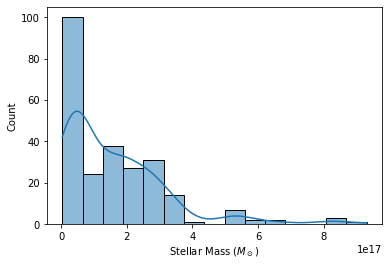

In [21]:
major_mbh = major_results[major_results.id.isin(s82x_mbh_ids)]
sns.histplot(data=major_mbh, x='bayes.stellar.m_star', kde = True)
plt.xlabel('Stellar Mass ($M_\odot$)')

In [31]:
major_results.head()

,id,best.stellar.m_star,bayes.stellar.m_star,bayes.stellar.m_star_err,best.reduced_chi_square,best.sfh.age_main,best.sfh.tau_main,bayes.agn.luminosity,bayes.agn.fracAGN,bayes.agn.luminosity_err,bayes.agn.fracAGN_err,redshift
0,2563,1.943878e+15,4.249860e+15,1.767623e+15,7.782284,500.0,200.0,4.028108e+42,0.141578,2.579982e+42,0.081304,0.304762
1,4159,2.495061e+15,3.053244e+15,1.247776e+15,4.636050,500.0,200.0,8.196575e+42,0.105817,1.926314e+42,0.041493,0.344412
2,4409,3.847632e+15,4.637642e+15,1.017745e+15,8.586950,1000.0,200.0,3.083965e+42,0.160958,2.090403e+42,0.093639,0.255167
3,3388,4.084083e+15,3.565002e+15,1.075355e+15,9.156857,500.0,200.0,7.437757e+42,0.101917,1.253213e+42,0.019719,0.393802
4,4739,4.112456e+15,2.239985e+15,1.386412e+15,8.910529,7000.0,1000.0,4.221108e+42,0.539590,3.548757e+41,0.200121,0.153150


In [32]:
# major_results.to_csv('out/results.txt', index = False, encoding = 'ascii', sep = '\t', na_rep = float('NaN'))
# .to_csv('out/results.txt', index = False, encoding = 'ascii', sep = '\t', na_rep = float('NaN'))

### Save in related folders

In [13]:
import shutil
import os
import glob

In [17]:
sed_fname = []
pdf_fname = []
chi2_fname = []


sed_fname = glob.glob(f"out/relevant_plots/sed/*_best_model.pdf")
pdf_fname = glob.glob(f"out/relevant_plots/sed/*_pdf.pdf")
chi2_fname = glob.glob(f"out/relevant_plots/sed/*_chi2.pdf")
print(chi2_fname)

['out/relevant_plots/sed/2598_sfh.sfr_chi2.pdf', 'out/relevant_plots/sed/2471_sfh.sfr_chi2.pdf', 'out/relevant_plots/sed/2387_sfh.sfr_chi2.pdf', 'out/relevant_plots/sed/2387_agn.luminosity_chi2.pdf', 'out/relevant_plots/sed/2387_agn.fracAGN_chi2.pdf', 'out/relevant_plots/sed/2360_agn.luminosity_chi2.pdf', 'out/relevant_plots/sed/2471_agn.fracAGN_chi2.pdf', 'out/relevant_plots/sed/2463_stellar.m_star_chi2.pdf', 'out/relevant_plots/sed/2598_stellar.m_star_chi2.pdf', 'out/relevant_plots/sed/2635_agn.fracAGN_chi2.pdf', 'out/relevant_plots/sed/2360_stellar.m_star_chi2.pdf', 'out/relevant_plots/sed/2471_stellar.m_star_chi2.pdf', 'out/relevant_plots/sed/2360_sfh.sfr_chi2.pdf', 'out/relevant_plots/sed/2471_agn.luminosity_chi2.pdf', 'out/relevant_plots/sed/2525_agn.fracAGN_chi2.pdf', 'out/relevant_plots/sed/2635_sfh.sfr_chi2.pdf', 'out/relevant_plots/sed/2525_stellar.m_star_chi2.pdf', 'out/relevant_plots/sed/2635_stellar.m_star_chi2.pdf', 'out/relevant_plots/sed/2563_agn.luminosity_chi2.pdf', '

In [39]:
chi2_fname[0].split("/")[-1]

'2598_sfh.sfr_chi2.pdf'

In [33]:
#os.mkdir('out')
#os.mkdir('out/relevant_plots')


In [41]:
os.mkdir('out/relevant_plots/sed')
directory = os.getcwd()
new_directory = os.path.join(directory, 'relevant_plots/sed')

print(directory)
print(new_directory)

for file in sed_fname:
    old_loc = f"{directory}/{file}"
    new_loc = f"out/relevant_plots/sed/{file.split('/')[-1]}"
    shutil.move(old_loc, new_loc)

/wsu/home/hq/hq23/hq2335/cigale-v2022.1/S82X_v7
/wsu/home/hq/hq23/hq2335/cigale-v2022.1/S82X_v7/relevant_plots/sed


In [19]:
#os.mkdir('out/relevant_plots/chi2')
directory = os.getcwd()
new_directory = os.path.join(directory, 'relevant_plots/chi2')

print(directory)
print(new_directory)

for file in chi2_fname:
    old_loc = file
    new_loc = f"out/relevant_plots/chi2/{file.split('/')[-1]}"
    shutil.move(old_loc, new_loc)

/wsu/home/hq/hq23/hq2335/github/cigale_practice
/wsu/home/hq/hq23/hq2335/github/cigale_practice/relevant_plots/chi2


In [20]:
#os.mkdir('out/relevant_plots/pdf')
directory = os.getcwd()
new_directory = os.path.join(directory, 'relevant_plots/pdf')

print(directory)
print(new_directory)

for file in pdf_fname:
    old_loc = file
    new_loc = f"out/relevant_plots/pdf/{file.split('/')[-1]}"
    shutil.move(old_loc, new_loc)

/wsu/home/hq/hq23/hq2335/github/cigale_practice
/wsu/home/hq/hq23/hq2335/github/cigale_practice/relevant_plots/pdf
